<a href="https://colab.research.google.com/github/cxbxmxcx/Practical_AI_on_GCP/blob/master/Chapter_3_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on original source from The TensorFlow Authors 2019.

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
keras = tf.keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
len(test_labels)

10000

In [13]:
 import math
 def plot_data(num_images):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i])
      plt.xlabel(class_names[train_labels[i]])
  plt.show()

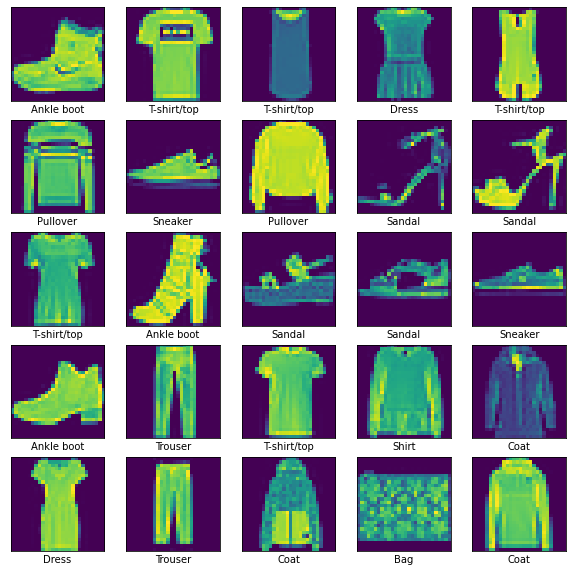

In [14]:
plot_data(25)

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images = np.expand_dims(train_images, 3)
test_images = np.expand_dims(test_images, 3)

In [17]:
train_images.shape

(60000, 28, 28, 1)

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6275 - accuracy: 0.7627 - val_loss: 0.4221 - val_accuracy: 0.8414
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4290 - accuracy: 0.8416 - val_loss: 0.3629 - val_accuracy: 0.8744
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3809 - accuracy: 0.8591 - val_loss: 0.3462 - val_accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3532 - accuracy: 0.8674 - val_loss: 0.3083 - val_accuracy: 0.8881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3321 - accuracy: 0.8747 - val_loss: 0.3097 - val_accuracy: 0.8845
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3245 - accuracy: 0.8788 - val_loss: 0.2920 - val_accuracy: 0.8932
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8822 - val_loss: 0.2865 - val_accuracy:

313/313 - 1s - loss: 0.3001 - accuracy: 0.8876


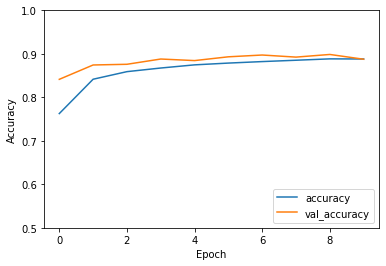

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [26]:
print(test_acc)

0.8876000046730042


Improving on the model


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SpatialDropout2D(.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.SpatialDropout2D(.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.SpatialDropout2D(.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 9, 9, 64)         

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6223 - accuracy: 0.7762 - val_loss: 0.4020 - val_accuracy: 0.8583
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4241 - accuracy: 0.8473 - val_loss: 0.3395 - val_accuracy: 0.8801
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3789 - accuracy: 0.8628 - val_loss: 0.3175 - val_accuracy: 0.8840
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3571 - accuracy: 0.8691 - val_loss: 0.3141 - val_accuracy: 0.8877
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3417 - accuracy: 0.8743 - val_loss: 0.2931 - val_accuracy: 0.8917
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3273 - accuracy: 0.8784 - val_loss: 0.2964 - val_accuracy: 0.8877
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3171 - accuracy: 0.8831 - val_loss: 0.2832 - val_accuracy:

313/313 - 1s - loss: 0.2433 - accuracy: 0.9121


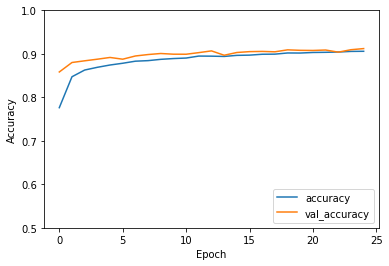

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)